In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

In [4]:
ts_raw  = ts.dropna()
ts_sqrt = np.sqrt(ts_raw)
ts_log  = np.log(ts_raw)


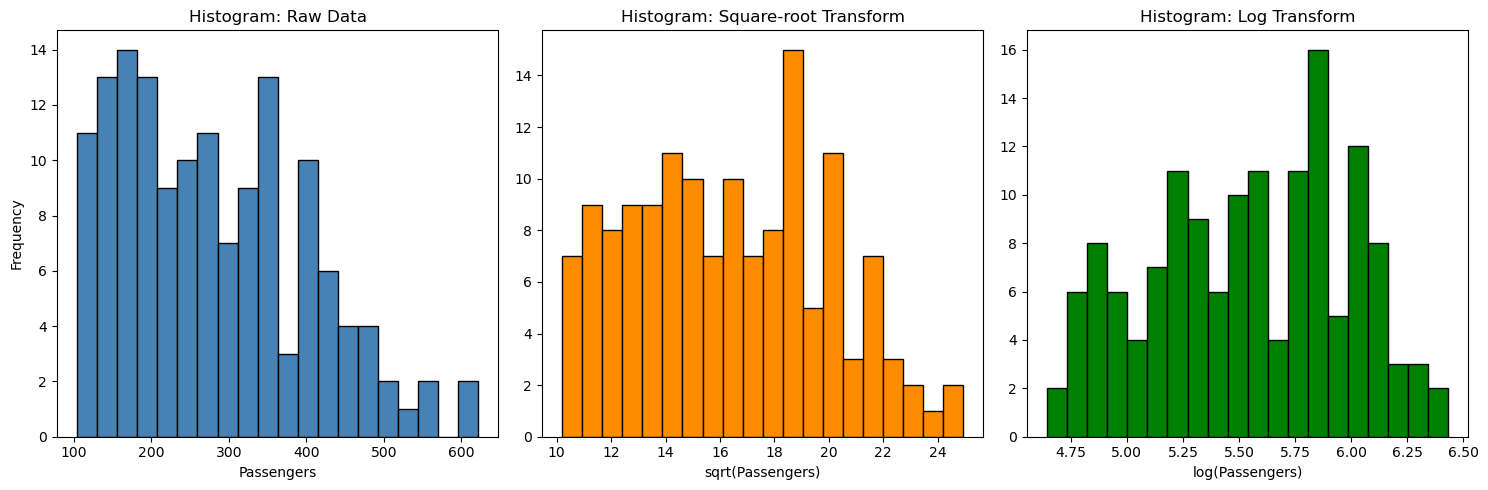

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].hist(ts_raw, bins=20, color="steelblue", edgecolor="black")
axes[0].set_title("Histogram: Raw Data")
axes[0].set_xlabel("Passengers")
axes[0].set_ylabel("Frequency")

axes[1].hist(ts_sqrt, bins=20, color="darkorange", edgecolor="black")
axes[1].set_title("Histogram: Square-root Transform")
axes[1].set_xlabel("sqrt(Passengers)")

axes[2].hist(ts_log, bins=20, color="green", edgecolor="black")
axes[2].set_title("Histogram: Log Transform")
axes[2].set_xlabel("log(Passengers)")

plt.tight_layout()
plt.show()

